<a href="https://colab.research.google.com/github/microprediction/microblog/blob/main/HalloweenGambit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install getjson
!pip install elosports

In [2]:
# My New Year's resolution is to become the World's leading authority on 
# the  Halloween Gambit. This spreadsheet is intended to capture my conditional 
# bullet rating and ascertain whether or not playing this gambit really
# helps as much as I think it does. 
#
# You can follow my feeble efforts at https://twitch.tv/microprediction

from getjson import getjson
results=list()
import numpy as np 

HANDLE = 'PinIsMightier'
TIME_CONTROL = "60"

def game_score(game_result):
    if game_result in ['win']:
        return 1.0
    elif game_result in ['agreed','insufficient','repetition','timevsinsufficient']:
        return 0.5 
    elif game_result in ['timeout','resigned','checkmated','abandoned']:
        return 0.0
    else:
      print(game_result+' is not classified yet.') 
      return np.nan


WHITE_ELO_ADVANTAGE = 10
for year in range(2021,2022):
  print("year "+str(year))
  for month in range(1,13):
    url = 'https://api.chess.com/pub/player/'+HANDLE+'/games/'+str(year)+'/'+str(month).zfill(2) 
    data = getjson(url=url)
    if data.get('games'):
      for game in data['games']:
          if 'Halloween-Gambit' in game['pgn']:
             if game['time_control']==str(TIME_CONTROL):
                game_result = game['white']['result']
                score = game_score(game_result)
                rating = game['white']['rating']
                opp_rating = game['black']['rating']
                expected_score = 1/(10.0**((opp_rating-WHITE_ELO_ADVANTAGE-rating)/400)+1 )
                results.append( (opp_rating, score, expected_score) )
                print((opp_rating,score,game_result, expected_score))
     

year 2021
(1866, 1.0, 'win', 0.6571186864870786)
(1850, 1.0, 'win', 0.6007782458900109)
(2042, 1.0, 'win', 0.34029200585525193)
(2019, 1.0, 'win', 0.403370826694226)
(2017, 0.0, 'timeout', 0.3746486066924632)
(1907, 1.0, 'win', 0.5416377027147634)
(2018, 0.0, 'resigned', 0.45979177167625435)
(1997, 1.0, 'win', 0.49424379158885506)
(2020, 0.0, 'checkmated', 0.46694860611555894)
(1969, 1.0, 'win', 0.5530468951694625)
(1970, 0.0, 'timeout', 0.5186997779295586)
(1906, 1.0, 'win', 0.5993967967092568)
(1932, 1.0, 'win', 0.6648579785547648)
(1903, 1.0, 'win', 0.7199190059471519)
(2070, 0.5, 'timevsinsufficient', 0.4971218004251891)
(1889, 1.0, 'win', 0.6427130688326204)
(1870, 0.0, 'timeout', 0.6813218351663937)
(2055, 1.0, 'win', 0.5316182978281073)
(2046, 0.0, 'timeout', 0.5129491448928637)
(2068, 0.0, 'timeout', 0.48705085510713625)
(1990, 0.0, 'timeout', 0.5530468951694625)
(2063, 1.0, 'win', 0.5530468951694625)
(2110, 1.0, 'win', 0.626699081666732)
(2579, 0.0, 'resigned', 0.0609783416579

Text(0, 0.5, 'Games')

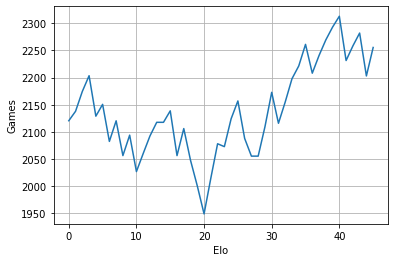

In [3]:
from elosports.elo import Elo
# Don't ask me why I'm importing this since Elo is so trivial but anyway...
eloLeague = Elo(k=100,homefield=0)
eloLeague.addPlayer("Me",rating=2100)
ratings = list()
edge = list()
for opp_rating, score, expected_score in results:
    eloLeague.addPlayer("Billy", rating=opp_rating)
    if score>0.9:
      eloLeague.gameOver(winner = "Me", loser = "Billy", winnerHome=True)
    elif score<0.1:
      eloLeague.gameOver(winner = "Billy", loser = "Me", winnerHome=False)
    ratings.append(eloLeague.ratingDict['Me'])
    edge.append(score-expected_score)
import matplotlib.pyplot as plt
plt.plot(ratings)
plt.grid()
plt.xlabel('Elo')
plt.ylabel('Games')

Text(0, 0.5, 'Extra games won')

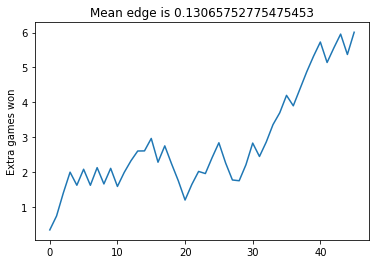

In [4]:
plt.plot(np.cumsum(edge))
plt.title('Mean edge is '+str(np.mean(edge)))
plt.ylabel('Extra games won')

In [ ]:
import pandas as pd 
df = pd.DataFrame.from_records(results, columns=['opp_rating','score','expected_score'])
df[-10:]

,opp_rating,score,expected_score
0,1866,1.0,0.657119
1,1850,1.0,0.600778
2,2042,1.0,0.340292
3,2019,1.0,0.403371
4,2017,0.0,0.374649
